# Exploratory Data Analysis

Seem to have lost initial words.ipynb where EDA was carried out.  This is replacement

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
worddatafile="../../voa/OBV2/obv_words_v2_28-01-2017.tsv"
trialdatafile="../../voa/OBV2/obv_defendants_trials.tsv"

worddata=pd.DataFrame.from_csv(worddatafile,sep='\t')
trialdata=pd.DataFrame.from_csv(trialdatafile,sep='\t')

/Users/juliewe/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [3]:
worddata.head()

,sess_date,year,obo_trial,obo_deftid,obc_u_no,obc_event,obc_speaker,obc_sex,obc_hiscoLabel,obc_hiscoCode,obc_class,obc_role,obv_role,words,obv_words_type,words_count,defendant
obv2wid,,,,,,,,,,,,,,,,,
1,17800112,1780,t17800112-1,NaN,1,17800112-1,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,"I live at No. 7, in Great Suffolk-street, Char...",s,40,MARY DYER
2,17800112,1780,t17800112-1,NaN,2,17800112-2,17800112-?LAW,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,Was that strange woman the prisoner?,q,6,MARY DYER
3,17800112,1780,t17800112-1,NaN,3,17800112-3,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,Yes; she said she only wanted a pint of purl.,a,10,MARY DYER
4,17800112,1780,t17800112-1,NaN,4,17800112-4,17800112-?LAW,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,Do you keep a public-house?,q,5,MARY DYER
5,17800112,1780,t17800112-1,NaN,5,17800112-5,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,"No, a private house. I sent for a constable, a...",a,16,MARY DYER


In [7]:
nonlegal=pd.concat([worddata[worddata['obv_role']=='wv'],worddata[worddata['obv_role']=='def']])
female=nonlegal[nonlegal['obc_sex']=='f']
male=nonlegal[nonlegal['obc_sex']=='m']

In [8]:
male.head()

,sess_date,year,obo_trial,obo_deftid,obc_u_no,obc_event,obc_speaker,obc_sex,obc_hiscoLabel,obc_hiscoCode,obc_class,obc_role,obv_role,words,obv_words_type,words_count,defendant
obv2wid,,,,,,,,,,,,,,,,,
1,17800112,1780,t17800112-1,NaN,1,17800112-1,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,"I live at No. 7, in Great Suffolk-street, Char...",s,40,MARY DYER
3,17800112,1780,t17800112-1,NaN,3,17800112-3,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,Yes; she said she only wanted a pint of purl.,a,10,MARY DYER
5,17800112,1780,t17800112-1,NaN,5,17800112-5,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,"No, a private house. I sent for a constable, a...",a,16,MARY DYER
7,17800112,1780,t17800112-1,NaN,7,17800112-7,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,No.,a,1,MARY DYER
10,17800112,1780,t17800112-1,NaN,10,17800112-10,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,Never in my life.,a,4,MARY DYER


In [10]:
male_utterances_by_year=male.groupby('year')['obc_event'].nunique()

In [18]:
male_utterances_by_year

year
1780    2946
1781    2449
1782    1634
1783    1264
1784     410
1785    1240
1786     996
1787    2151
1790     824
1791    2413
1792    1798
1793    2421
1794    1282
1795    2953
1796    1209
1797    2283
1798    1607
1800    4507
1802    2555
1803    2817
1804     785
1805    1373
1806    1117
1807     725
1808     658
1809     532
1810    2082
1811     506
1812    3137
1813    2088
        ... 
1843    3486
1845    1448
1846     284
1848     308
1849     837
1850    1517
1851     757
1852    1626
1853    1214
1854    1397
1855     299
1857     632
1859     284
1860     410
1861    1253
1862    2198
1864     672
1865     600
1866     486
1867    1019
1868     785
1869     698
1870    1276
1871    1900
1872    1380
1873     411
1874     326
1875     185
1878     407
1880    2268
Name: obc_event, dtype: int64

In [88]:
male_years_words=male.ix[:,['year','words']]
maletotaldict={}
for row in male_years_words.itertuples():
    #print(row[1],row[2])
    tokens=row[2].split(' ')
    decade=int(row[1]/10)*10
    maletotaldict[decade]=maletotaldict.get(decade,0)+len(tokens)
print(maletotaldict)

print(sum(maletotaldict.values()))

{1780: 453985, 1790: 543530, 1800: 498349, 1810: 634008, 1820: 671786, 1830: 1096151, 1840: 796071, 1850: 756298, 1860: 854920, 1870: 737546, 1880: 341268}
7383912


In [37]:
female_utterances_by_year=female.groupby('year')['obc_event'].nunique()
female_utterances_by_year

year
1780    1070
1781     532
1782     420
1783     181
1785     237
1786     337
1787     411
1790     413
1791     397
1792     252
1793     375
1794     467
1795     989
1796     259
1797     748
1798     358
1800     997
1802     516
1803     635
1804     184
1805     374
1806     323
1807      90
1808     189
1809     195
1810     542
1811     193
1812     980
1813     391
1814     119
        ... 
1843     794
1845     341
1846      53
1848      70
1849     147
1850     301
1851     193
1852     395
1853     210
1854     339
1855      51
1857     187
1859      32
1860     116
1861     224
1862     433
1864     191
1865     119
1866     125
1867     220
1868     134
1869      69
1870     255
1871     399
1872     325
1873      62
1874      41
1875      58
1878      37
1880     383
Name: obc_event, dtype: int64

In [89]:
female_years_words=female.ix[:,['year','words']]
femaletotaldict={}
for row in female_years_words.itertuples():
    #print(row[1],row[2])
    tokens=row[2].split(' ')
    decade=int(row[1]/10)*10
    femaletotaldict[decade]=femaletotaldict.get(decade,0)+len(tokens)
print(femaletotaldict)
print(sum(femaletotaldict.values()))

{1780: 116136, 1790: 116122, 1800: 106212, 1810: 128089, 1820: 147269, 1830: 267641, 1840: 202578, 1850: 195408, 1860: 183332, 1870: 146718, 1880: 46417}
1655922


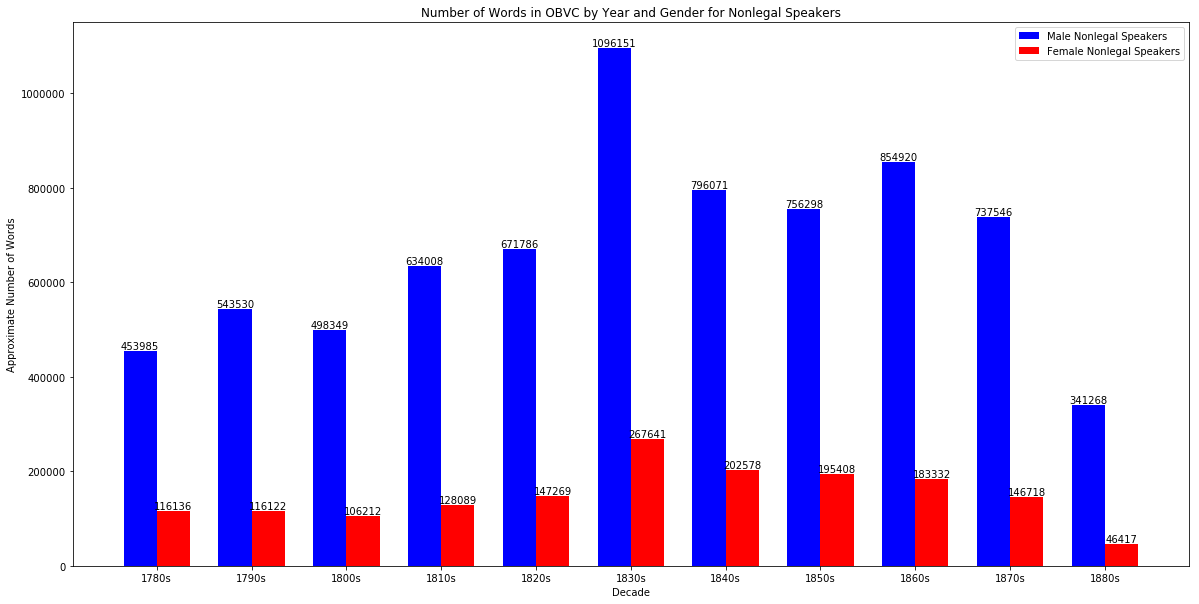

In [81]:
import numpy as np
years=range(1780,1890,10)
ms=[]
fs=[]
labels=[]
for y in years:
    ms.append(maletotaldict.get(y,0))
    fs.append(femaletotaldict.get(y,0))
    labels.append(str(y)+'s')
toplot=[ms,fs]
    
width=0.35
N=len(years)    
ind=np.arange(N)
fig,ax=plt.subplots(figsize=(20,10))
colors=['b','r']
rectset=[]
for i,plotset in enumerate(toplot):
    rectset.append(ax.bar(ind+(i-0.5)*width,plotset,width,color=colors[i]))

for rects in rectset:
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height + 1,
        '%1.0f' % height,ha='center', va='bottom')    
    
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend(['Male Nonlegal Speakers','Female Nonlegal Speakers'])
ax.set_xlabel('Decade')
ax.set_ylabel("Approximate Number of Words")
ax.set_title('Number of Words in OBVC by Year and Gender for Nonlegal Speakers')
plt.show()  


In [99]:
male_joined=pd.merge(male,trialdata,on=['obo_trial','year'])
male_select=male_joined.ix[:,['year','deft_offcat','words']]
female_joined=pd.merge(female,trialdata,on=['obo_trial','year'])
female_select=female_joined.ix[:,['year','deft_offcat','words']]

print(len(male),len(male_joined))

118269 118269


In [100]:
maleoffdict={}
for row in male_select.itertuples():
    offence=row[2]
    tokens=row[3].split(' ')
    #print(tokens)
    maleoffdict[offence]=maleoffdict.get(offence,0)+len(tokens)
    #break
femaleoffdict={}
for row in female_select.itertuples():
    offence=row[2]
    tokens=row[3].split(' ')
    #print(tokens)
    femaleoffdict[offence]=femaleoffdict.get(offence,0)+len(tokens)
    #break
print(maleoffdict)
print(femaleoffdict)

print(sum(maleoffdict.values()))
print(sum(femaleoffdict.values()))

{'theft': 4238906, 'violentTheft': 359008, 'royalOffences': 410452, 'miscellaneous': 118122, 'damage': 115368, 'breakingPeace': 470734, 'kill': 645020, 'deception': 984159, 'sexual': 42143}
{'theft': 871982, 'violentTheft': 76165, 'damage': 22118, 'breakingPeace': 143111, 'royalOffences': 145480, 'kill': 227715, 'deception': 115116, 'sexual': 35256, 'miscellaneous': 18979}
7383912
1655922


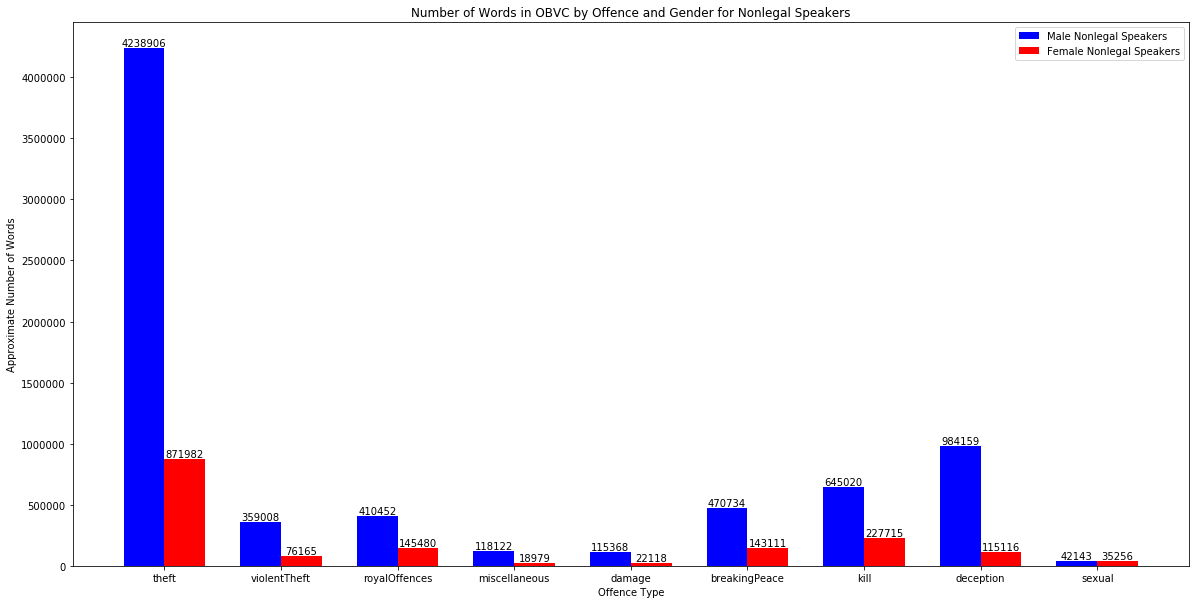

In [101]:
xs=maleoffdict.keys()
ms=[]
fs=[]
for x in xs:
    ms.append(maleoffdict.get(x,0))
    fs.append(femaleoffdict.get(x,0))
toplot=[ms,fs]
    
width=0.35
N=len(xs)    
ind=np.arange(N)
fig,ax=plt.subplots(figsize=(20,10))
colors=['b','r']
rectset=[]
for i,plotset in enumerate(toplot):
    rectset.append(ax.bar(ind+(i-0.5)*width,plotset,width,color=colors[i]))

for rects in rectset:
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height + 1,
        '%1.0f' % height,ha='center', va='bottom')    
    
ax.set_xticks(ind)
ax.set_xticklabels(xs)
ax.legend(['Male Nonlegal Speakers','Female Nonlegal Speakers'])
ax.set_xlabel('Offence Type')
ax.set_ylabel("Approximate Number of Words")
ax.set_title('Number of Words in OBVC by Offence and Gender for Nonlegal Speakers')
plt.show()  


In [103]:
myoffence='theft'
maletheftdict={}
for row in male_select.itertuples():
    year=row[1]
    offence=row[2]
    tokens=row[3].split(' ')
    if offence==myoffence:
        maletheftdict[year]=maletheftdict.get(year,0)+len(tokens)
femaletheftdict={}
for row in female_select.itertuples():
    year=row[1]
    offence=row[2]
    tokens=row[3].split(' ')
    if offence==myoffence:
        femaletheftdict[year]=femaletheftdict.get(year,0)+len(tokens)
print(maletheftdict)
print(femaletheftdict)

{1780: 85673, 1781: 53098, 1782: 44035, 1783: 29341, 1785: 25669, 1786: 20471, 1787: 50703, 1790: 20832, 1791: 77500, 1792: 59313, 1793: 48509, 1794: 26689, 1795: 56867, 1796: 41558, 1797: 48062, 1798: 33134, 1800: 109577, 1802: 76246, 1803: 64749, 1804: 12953, 1805: 34803, 1806: 33164, 1807: 21921, 1808: 20378, 1809: 24213, 1810: 68870, 1811: 17467, 1812: 82785, 1813: 64807, 1814: 16271, 1815: 87382, 1816: 22915, 1817: 77538, 1818: 35073, 1820: 64858, 1821: 125440, 1822: 61031, 1823: 48844, 1825: 36322, 1826: 46959, 1827: 99008, 1829: 33501, 1830: 49702, 1832: 51450, 1834: 36533, 1835: 247251, 1836: 149218, 1837: 84379, 1838: 103807, 1839: 91263, 1841: 155912, 1842: 15243, 1843: 175321, 1845: 86360, 1846: 11411, 1848: 13666, 1849: 49672, 1850: 69685, 1851: 32996, 1852: 66045, 1853: 38157, 1854: 31773, 1855: 16720, 1857: 16920, 1859: 11633, 1860: 25303, 1861: 48467, 1862: 80525, 1864: 25535, 1865: 23602, 1866: 15196, 1867: 24491, 1868: 22554, 1869: 20127, 1870: 30144, 1871: 58398, 1872

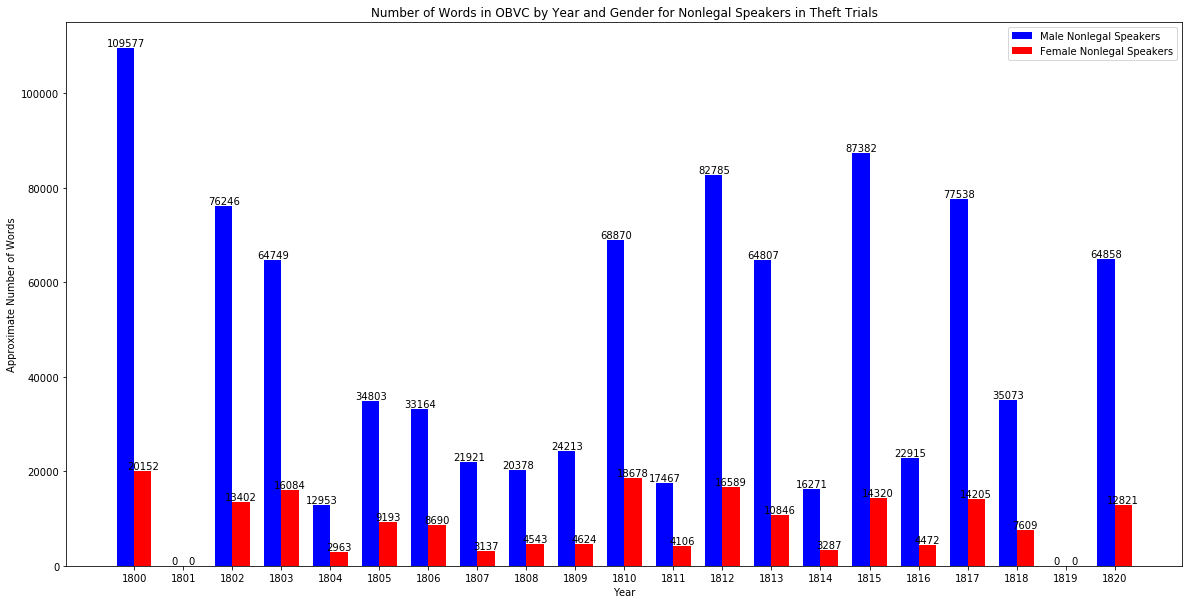

In [104]:
years=range(1800,1821,1)
ms=[]
fs=[]
labels=[]
for y in years:
    ms.append(maletheftdict.get(y,0))
    fs.append(femaletheftdict.get(y,0))
    labels.append(str(y))
toplot=[ms,fs]
    
width=0.35
N=len(years)    
ind=np.arange(N)
fig,ax=plt.subplots(figsize=(20,10))
colors=['b','r']
rectset=[]
for i,plotset in enumerate(toplot):
    rectset.append(ax.bar(ind+(i-0.5)*width,plotset,width,color=colors[i]))

for rects in rectset:
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., height + 1,
        '%1.0f' % height,ha='center', va='bottom')    
    
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend(['Male Nonlegal Speakers','Female Nonlegal Speakers'])
ax.set_xlabel('Year')
ax.set_ylabel("Approximate Number of Words")
ax.set_title('Number of Words in OBVC by Year and Gender for Nonlegal Speakers in Theft Trials')
plt.show()  


In [105]:
print(sum(ms))
print(sum(fs))

935970
189721
